1. Name - Humera Bano
2. Github Username - humera811
3. USC ID - 7255691039


In [126]:
# organizing all imports together

import pandas as pd
import numpy as np
import statsmodels.api as stat
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from importlib import reload
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors, metrics, preprocessing
from sklearn.metrics.pairwise import euclidean_distances
from importlib import reload
import math

### 1(a)Download the Combined Cycle Power Plant data from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#

In [127]:
df = pd.read_excel('../../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### 1 (b)Exploring the data:
    i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [128]:
n_rows = len(df)
n_col = len(df.columns)
print('Number of rows are {}'.format(n_rows))
print('number of columns are {}'.format(n_col))
print('Rows represent an instance of dataset. The 4 columns are : AT - Ambient Temperature, V - Exhaust Vacuum, AP- Ambient Pressure, RH- Relative Humidity features, 5th column PE- net hourly electrical energy output which is the response')


Number of rows are 9568
number of columns are 5
Rows represent an instance of dataset. The 4 columns are : AT - Ambient Temperature, V - Exhaust Vacuum, AP- Ambient Pressure, RH- Relative Humidity features, 5th column PE- net hourly electrical energy output which is the response


### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

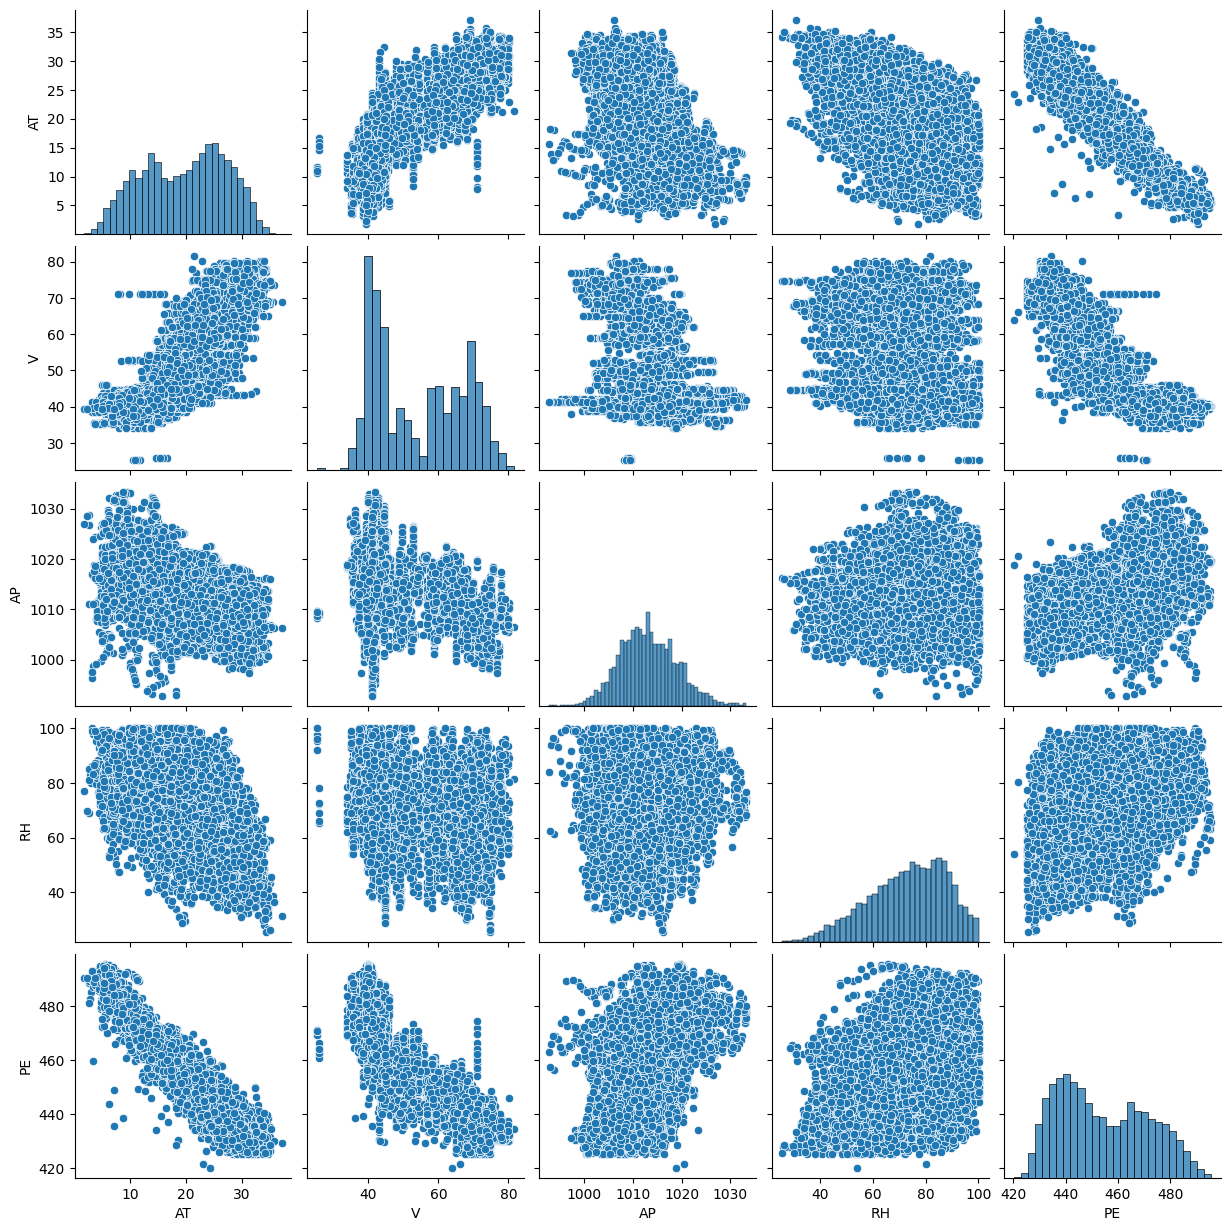

In [129]:
plots = sns.pairplot(df)

Findings Description: 
- AT and V have a linear positive correlation.
- AT and PE have a negative correlation.
- V and PE have a negative correlation.
- AP and RH do not have any linear realtionship with other independednt variables.

### 1(b)iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [130]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [131]:
feature = [col for col in df.columns]
mean = [np.around(df[col].mean(), 2) for col in df.columns]
median = [np.around(df[col].median(), 2) for col in df.columns]
range_stat = [np.around(df[col].max() - df[col].min(), 2) for col in df.columns]
first_quartile = [np.around(np.percentile(df[col], 25), 2) for col in df.columns]
third_quartile = [np.around(np.percentile(df[col], 75), 2) for col in df.columns]
inter_quartile = list(np.array(third_quartile)-np.array(first_quartile))
table_summary = pd.DataFrame({'feature': feature, 'mean': mean, 'median': median, 'range': range_stat, 'first-Quartiles' : first_quartile, 'second-Quartiles' : third_quartile, 'in-terquartile' : inter_quartile })
table_summary

,feature,mean,median,range,first-Quartiles,second-Quartiles,in-terquartile
0,AT,19.65,20.34,35.30,13.51,25.72,12.21
1,V,54.31,52.08,56.20,41.74,66.54,24.80
2,AP,1013.26,1012.94,40.41,1009.10,1017.26,8.16
3,RH,73.31,74.97,74.60,63.33,84.83,21.50
4,PE,454.37,451.55,75.50,439.75,468.43,28.68


### 1(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [132]:
#https://www.analyticsvidhya.com/blog/2021/05/learn-simple-linear-regression-slr/?utm_source=feed&utm_medium=feed-articles&utm_campaign=feed
X_AT = df["AT"].to_numpy()
y = df["PE"].to_numpy()
X2 = stat.add_constant(X_AT) 
model_fit = stat.OLS(y, X2)
res = model_fit.fit()
coeff = res.params
coefficient_of_AT = res.params[1]
print(coeff)
print(coefficient_of_AT)
print("Summary of AT and PE is {}".format(res.summary()))


[497.03411989  -2.17131996]
-2.1713199585177856
Summary of AT and PE is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

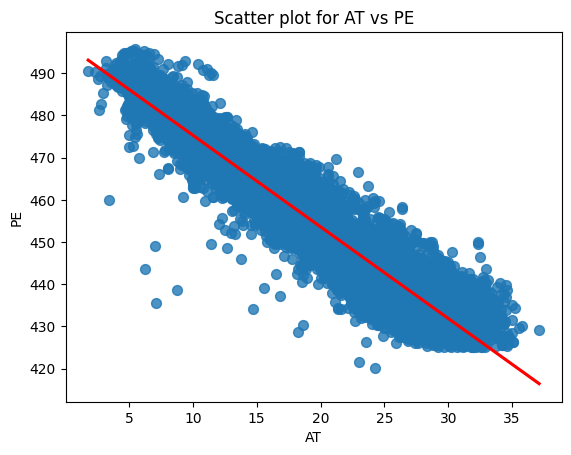

In [133]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
plt.title("Scatter plot for AT vs PE")
plt.xlabel('AT')
plt.ylabel('PE')
sns.regplot(fit_reg = True, scatter = True, x= 'AT', y='PE', data = df[['AT', 'PE']], line_kws={'color':'r'}, marker = 'o', scatter_kws = {'s':50})
plt.show()

The number of outliers: []
There are no outliers


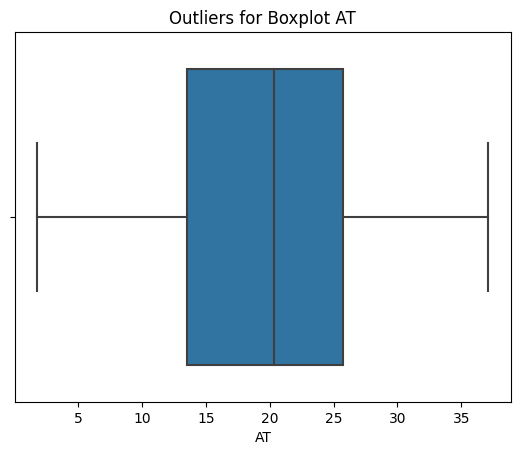

In [134]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
plot = sns.boxplot(x=df["AT"])
plot.set_title("Outliers for Boxplot AT")
plot.set_xlabel('AT')
print('The number of outliers: {}'.format(boxplot_stats(df["AT"]).pop(0)['fliers']))
print('There are no outliers')


In [135]:
X_V = df["V"].to_numpy()
y = df["PE"].to_numpy()
XV2 = stat.add_constant(X_V)
model_fit = stat.OLS(y, XV2)
res = model_fit.fit()
coeff = res.params
coefficient_of_V = res.params[1]
print(coeff)
print(coefficient_of_V)
print("Summary of V and PE is {}".format(res.summary()))

[517.80152631  -1.16813513]
-1.168135126555712
Summary of V and PE is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:29   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

[Text(0.5, 1.0, 'Scatter Plot for V vs PE')]

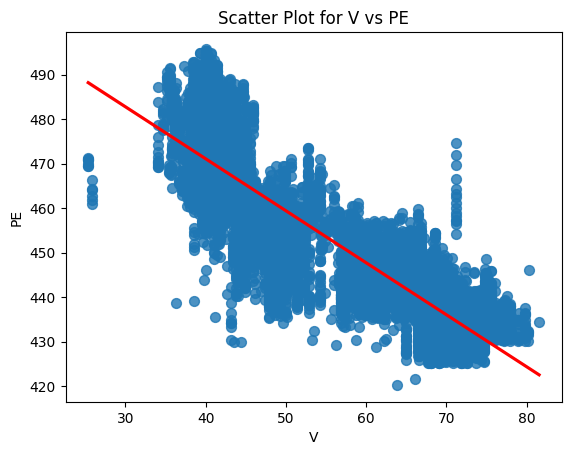

In [136]:
sns.regplot(fit_reg = True, scatter = True, x= 'V', y='PE', data = df[['V', 'PE']], line_kws={"color":"r"}, marker = 'o', scatter_kws = {'s':50}).set(title='Scatter Plot for V vs PE')

The number of outliers are []
There are no outliers


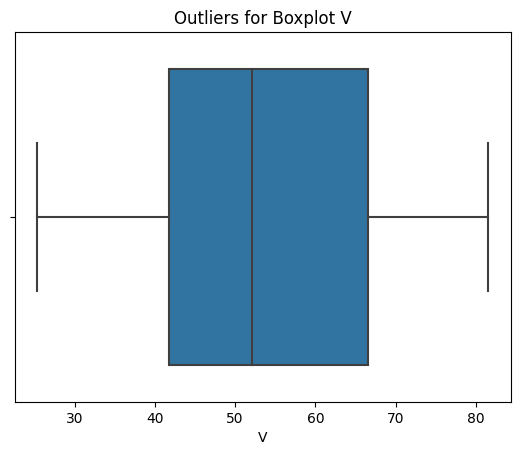

In [137]:
plot = sns.boxplot(x=df["V"])
plot.set_title("Outliers for Boxplot V")
plot.set_xlabel('V')
print('The number of outliers are {}'.format(boxplot_stats(df["V"]).pop(0)['fliers']))
print('There are no outliers')

In [138]:
X_AP = df["AP"].to_numpy()
y = df["PE"].to_numpy()
XAP2 = stat.add_constant(X_AP)
model_fit = stat.OLS(y, XAP2)
res = model_fit.fit()
coeff = res.params
coefficient_of_AP = res.params[1]
print(coeff)
print(coefficient_of_AP)
print("Summary of AT and PE is {}".format(res.summary()))

[-1055.26098898     1.48987167]
1.4898716733991142
Summary of AT and PE is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:32   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

[Text(0.5, 1.0, 'Scatter Plot for AP vs PE')]

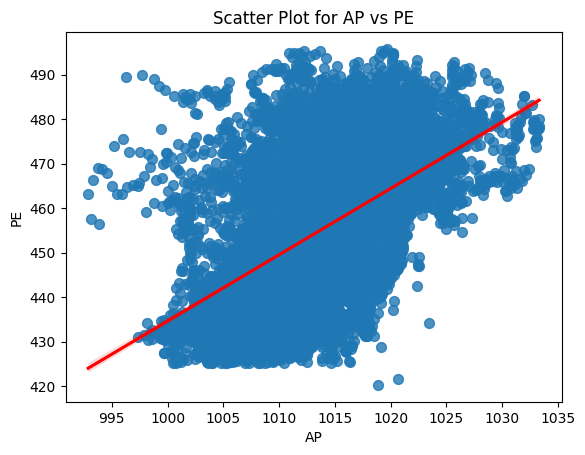

In [139]:
sns.regplot(fit_reg = True, scatter = True, x= 'AP', y='PE', data = df[['AP', 'PE']], line_kws={"color":"r"}, marker = 'o', scatter_kws = {'s':50}).set(title='Scatter Plot for AP vs PE')


The outliers are:


array([ 994.17,  995.88,  995.24,  996.32,  996.55,  996.35,  996.03,
        993.31,  995.45,  995.02,  993.82,  994.6 ,  993.74,  993.11,
        992.89, 1030.46, 1033.25, 1030.18, 1031.1 , 1029.65, 1029.8 ,
       1033.04, 1033.3 , 1032.67, 1033.08, 1031.55, 1029.6 , 1030.3 ,
       1031.5 , 1030.94, 1030.83, 1031.96, 1031.01, 1030.77, 1032.98,
       1032.93, 1031.33, 1030.86, 1030.72, 1033.19, 1031.96, 1030.42,
       1032.86, 1032.77, 1029.63, 1033.09, 1030.82, 1029.99, 1031.8 ,
       1032.08, 1033.14, 1029.54, 1032.88, 1029.7 , 1030.81, 1030.  ,
       1030.2 , 1032.72, 1031.45, 1032.14, 1029.91, 1031.14, 1032.83,
       1032.37, 1032.16, 1031.16, 1030.72, 1029.9 , 1030.1 , 1029.61,
       1031.39, 1031.2 , 1031.27, 1030.38, 1031.97, 1033.29, 1031.58,
       1031.08, 1031.75, 1029.54, 1029.7 , 1031.21, 1031.34, 1030.68,
       1031.71, 1031.21, 1031.32, 1030.61])

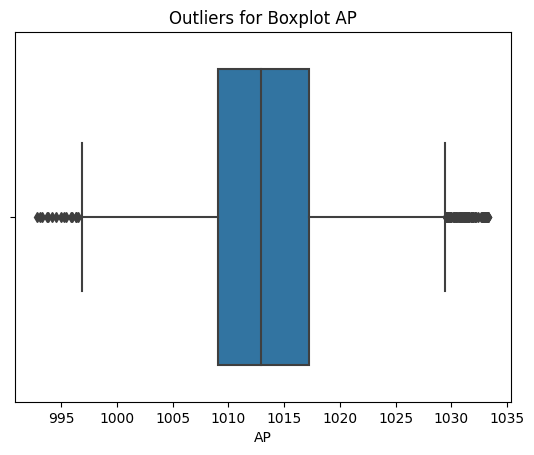

In [140]:
plot = sns.boxplot(x=df["AP"])
plot.set_title("Outliers for Boxplot AP")
plot.set_xlabel('AP')
print('The outliers are:')
boxplot_stats(df["AP"]).pop(0)['fliers']

In [141]:
X_RH = df['RH'].to_numpy()
y = df['PE'].to_numpy()
XRH2 = stat.add_constant(X_RH)
model_fit = stat.OLS(y, XRH2)
res = model_fit.fit()
coeff = res.params
coefficient_of_RH = res.params[1]
print(coeff)
print(coefficient_of_RH)
print("Summary of RH and PE is {}".format(res.summary()))

[420.96176616   0.4556501 ]
0.45565010226298336
Summary of RH and PE is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:34   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

[Text(0.5, 1.0, 'Scatter Plot for RH vs PE')]

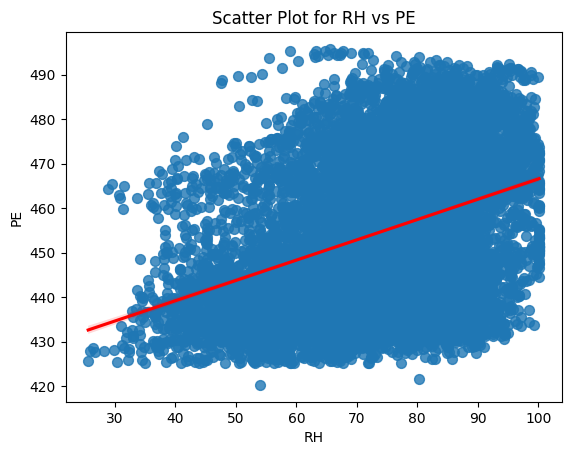

In [142]:
sns.regplot(fit_reg = True, scatter = True, x= 'RH', y='PE', data = df[['RH', 'PE']], line_kws={"color":"r"}, marker = 'o', scatter_kws = {'s':50}).set(title='Scatter Plot for RH vs PE')


There outliers are:


array([25.89, 28.16, 29.43, 26.67, 29.86, 30.59, 25.56, 30.83, 28.81,
       26.3 , 30.34, 30.99])

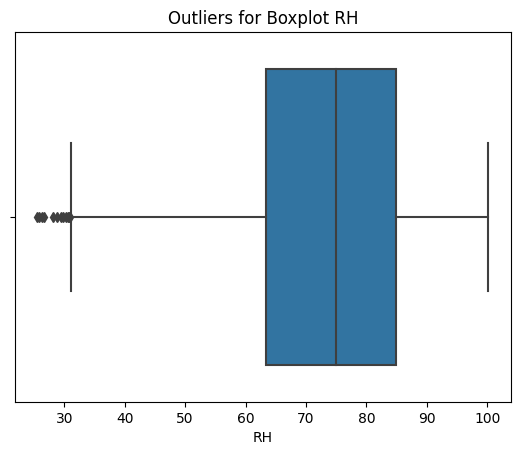

In [143]:
plot = sns.boxplot(x=df["RH"])
plot.set_title("Outliers for Boxplot RH")
plot.set_xlabel('RH')
print('There outliers are:')
boxplot_stats(df["RH"]).pop(0)['fliers']

- All of the predictors are statistically significant. AT &V positive wherease RH & AP negative with PE

### 1.(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H 0 : β j = 0?

In [144]:
X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]
X2 = stat.add_constant(X)
model_fit = stat.OLS(y, X2)
res = model_fit.fit()
coeff = res.params
print(coeff)
print(res.pvalues)
print("Summary of X and PE is {}".format(res.summary()))


const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64
const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64
Summary of X and PE is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:36   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:     

we can reject all the null hypothesis H 0 : β j = 0 as P values for all of the predictors are significatly low (less than 0.05) and close to 0.

### 1.e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [145]:
coefficients = pd.DataFrame({'Simple Regression Coefficient': [coefficient_of_AT,coefficient_of_V , coefficient_of_AP,coefficient_of_RH],'Multiple regression coefficient': res.params.values[1:]})
coefficients

,Simple Regression Coefficient,Multiple regression coefficient
0,-2.171320,-1.977513
1,-1.168135,-0.233916
2,1.489872,0.062083
3,0.455650,-0.158054


[Text(0.5, 1.0, 'Coefficients of SLR and MLR ')]

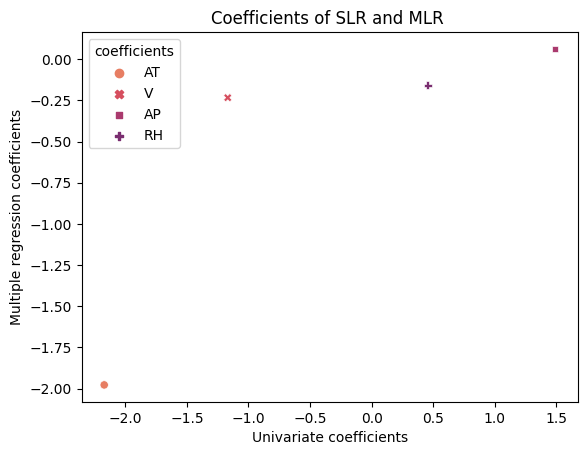

In [146]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
X = [-2.17131996,-1.16813513,1.48987167,0.4556501]
Y = [-1.9775,-0.2339,0.0621 ,-0.1581]
Z = ['AT','V','AP','RH']
data_plot = pd.DataFrame({"Univariate coefficients": X, "Multiple regression coefficients": Y,"coefficients": Z})
sns.scatterplot(x="Univariate coefficients", y="Multiple regression coefficients",style = "coefficients", palette='flare', sizes=(20, 200), hue="coefficients", legend="full", data=data_plot).set(title='Coefficients of SLR and MLR ')


### 1.(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X , fit a model of the form Y = β 0 + β 1 X + β 2 X 2 + β 3 X 3 + E

In [147]:
def polynomialFeature(col_name, X = df[["AT", "V", "AP", "RH"]], d = 3, y = df["PE"] ):
    poly = PolynomialFeatures(degree=3)
    X_POLY = poly.fit_transform(X[[col_name]])
    X_OLS = stat.add_constant(X_POLY)
    model_fit = stat.OLS(y, X_OLS)
    res = model_fit.fit()
    coeff = res.params
    coefficient_AT = res.params[1]
    print(coeff)
    print("p values:\n{}".format(res.pvalues))
    print("Summary of",col_name," and PE is {}".format(res.summary()))
    return res,  res.pvalues

In [148]:
# AT
val_AT, pval_AT = polynomialFeature('AT')

const    492.728143
x1        -0.610346
x2        -0.125138
x3         0.002675
dtype: float64
p values:
const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64
Summary of AT  and PE is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:37   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust               

In [149]:
# V
val_V, pval_V = polynomialFeature('V')

const    554.146849
x1        -2.144377
x2        -0.002712
x3         0.000134
dtype: float64
p values:
const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64
Summary of V  and PE is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:37   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                    

In [150]:
# AP
val_AP, pval_AP = polynomialFeature('AP')

const     0.074694
x1       25.255593
x2       -0.049952
x3        0.000025
dtype: float64
p values:
const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64
Summary of AP  and PE is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:37   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                       

In [151]:
# RH
val_RH, pval_RH = polynomialFeature('RH')

const    468.413536
x1        -1.729211
x2         0.032145
x3        -0.000152
dtype: float64
p values:
const    0.000000
x1       0.000377
x2       0.000009
x3       0.000014
dtype: float64
Summary of RH  and PE is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:37   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                   

Yes, there is evidence of nonlinear association between predictors AT, V, AP, RH and response PE.

### 1.(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant

In [152]:
results_interaction = smf.ols(formula = "PE ~ AT + V + AP + RH + V*AP + AP*RH + AT*AP + AT*V + V*RH + AT*RH", data = df)
res = results_interaction.fit()
coeff = res.params
print("coefficients are: \n{}".format(coeff))
print("\npvalues are: \n{}".format (res.pvalues))

coefficients are: 
Intercept    685.782468
AT            -4.347014
V             -7.674858
AP            -0.152355
RH             1.570907
V:AP           0.006812
AP:RH         -0.001612
AT:AP          0.001759
AT:V           0.020971
V:RH           0.000839
AT:RH         -0.005230
dtype: float64

pvalues are: 
Intercept     3.231607e-18
AT            6.701873e-02
V             1.371251e-08
AP            4.735732e-02
RH            4.225213e-02
V:AP          2.877026e-07
AP:RH         3.360557e-02
AT:AP         4.520509e-01
AT:V         3.333358e-117
V:RH          8.619366e-02
AT:RH         1.216944e-10
dtype: float64


In [153]:
print("\n",res.summary())


                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:37   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0

The statistically significant terms for response PE are AT*V, AT*RH, VA*P, and AP*RH as pvalue for all are <0.05

### 1.h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [154]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# training data
X_data = df.loc[:, ['AT', 'V', 'AP', 'RH']]
y_data = df.loc[:, ['PE']]
X_orig, X_test_o, y_orig, y_test_o = train_test_split(X_data, y_data, test_size=0.3, shuffle = True, random_state= 42)

#training set
X_orig = stat.add_constant(X_orig)
orig_model = stat.OLS(y_orig, X_orig) 
orig_fit = orig_model.fit()
print(orig_fit.summary())
print('pvalues:\n{}'.format(orig_fit.pvalues))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:28:37   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

In [155]:
#train predict
X_orig = stat.add_constant(X_orig)
trainPredict = orig_fit.predict(X_orig)
trainMSE = mean_squared_error(y_orig, trainPredict)
print('The train MSE:', trainMSE)

#test set
X_test_o = stat.add_constant(X_test_o)
testPredict = orig_fit.predict(X_test_o)
testMSE = mean_squared_error(y_test_o, testPredict)
print('The orignal test MSE:', testMSE)

The train MSE: 20.580839725738688
The orignal test MSE: 21.23985693822534


In [156]:
# all possible interaction and quad terms
X_data = df.loc[:, ['AT', 'V', 'AP', 'RH']]
y_data = df.loc[:, ['PE']]
data_dict = {'AT':df['AT'],'V':df['V'],'AP':df['AP'],'RH':df['RH'],'AT**2':df['AT']*df['AT'],'V**2':df['V']*df['V'], 'AP**2':df['AP']*df['AP'],'RH**2':df['RH']*df['RH'],'AT*V':df['AT'] * df['V'] , 'AT*AP':df['AT'] * df['AP'],'AT*RH':df['AT'] * df['RH'],'V*AP': df['V'] * df['AP'],'V*RH': df['V'] * df['RH'],'AP*RH':df['AP'] * df['RH'] }

model_interaction = pd.DataFrame(data_dict)
X_alldata, X_alltest_data, y_alldata, y_alltes_data = train_test_split(model_interaction, y_data, test_size=0.3, random_state= 42)
print(X_alldata)

#stats model
X_alldata = stat.add_constant(X_alldata)
orig_model = stat.OLS(y_alldata, X_alldata) 
new_fit = orig_model.fit()
print(new_fit.summary())
print('pvalues:\n{}'.format(new_fit.pvalues))

         AT      V       AP     RH     AT**2       V**2         AP**2  \
8759  16.69  44.78  1010.41  58.18  278.5561  2005.2484  1.020928e+06   
1434  24.12  58.66  1011.55  58.96  581.7744  3440.9956  1.023233e+06   
7320   9.08  40.02  1031.20  75.34   82.4464  1601.6004  1.063373e+06   
2579   9.60  41.82  1032.93  72.63   92.1600  1748.9124  1.066944e+06   
9142  20.77  56.85  1012.40  83.63  431.3929  3231.9225  1.024954e+06   
...     ...    ...      ...    ...       ...        ...           ...   
5734  23.39  61.87  1010.35  48.91  547.0921  3827.8969  1.020807e+06   
5191  11.63  40.55  1022.89  87.12  135.2569  1644.3025  1.046304e+06   
5390  27.79  69.23  1012.86  45.71  772.2841  4792.7929  1.025885e+06   
860   12.26  41.50  1014.87  89.41  150.3076  1722.2500  1.029961e+06   
7270  11.75  40.55  1018.09  97.70  138.0625  1644.3025  1.036507e+06   

          RH**2       AT*V       AT*AP      AT*RH        V*AP       V*RH  \
8759  3384.9124   747.3782  16863.7429   971.02

In [157]:
#train predict
X_alldata = stat.add_constant(X_alldata)
pred_train = new_fit.predict(X_alldata)
trainMSError = mean_squared_error(y_alldata, pred_train)
print('The train MSE:', trainMSError)

#test predict
X_test_all = stat.add_constant(X_alltest_data)
pred_test = new_fit.predict(X_test_all)
testMSError = mean_squared_error(y_alltes_data, pred_test)
print('all test MSE:', testMSError)

The train MSE: 17.887799616633203
all test MSE: 18.647312478577543


In [158]:
#manually excluding insignificant terms
new_model_data = {'AT':df['AT'],'V':df['V'],'AP':df['AP'],'RH':df['RH'], 'AT^2':df['AT']**2,'AP^2':df['AP']**2,'RH^2':df['RH']**2, 'AT*V':df['AT'] * df['V'] ,'AT*RH':df['AT'] * df['RH'], 'AP*RH':df['AP'] * df['RH']}
new_model_interaction = pd.DataFrame(new_model_data)
X_new_data, X_new_test_data, y_new_data, y_new_test_data = train_test_split(new_model_interaction, y_data, test_size=0.3, random_state = 42)
print(X_new_data)

#stats model
X_new_data = stat.add_constant(X_new_data)
new_imp_model = stat.OLS(y_new_data, X_new_data)
new_moedel_fit = new_imp_model.fit()
print(new_moedel_fit.summary())
print('pvalues: {}\n'.format(new_moedel_fit.pvalues))

         AT      V       AP     RH      AT^2          AP^2       RH^2  \
8759  16.69  44.78  1010.41  58.18  278.5561  1.020928e+06  3384.9124   
1434  24.12  58.66  1011.55  58.96  581.7744  1.023233e+06  3476.2816   
7320   9.08  40.02  1031.20  75.34   82.4464  1.063373e+06  5676.1156   
2579   9.60  41.82  1032.93  72.63   92.1600  1.066944e+06  5275.1169   
9142  20.77  56.85  1012.40  83.63  431.3929  1.024954e+06  6993.9769   
...     ...    ...      ...    ...       ...           ...        ...   
5734  23.39  61.87  1010.35  48.91  547.0921  1.020807e+06  2392.1881   
5191  11.63  40.55  1022.89  87.12  135.2569  1.046304e+06  7589.8944   
5390  27.79  69.23  1012.86  45.71  772.2841  1.025885e+06  2089.4041   
860   12.26  41.50  1014.87  89.41  150.3076  1.029961e+06  7994.1481   
7270  11.75  40.55  1018.09  97.70  138.0625  1.036507e+06  9545.2900   

           AT*V      AT*RH       AP*RH  
8759   747.3782   971.0242  58785.6538  
1434  1414.8792  1422.1152  59640.9880  


In [159]:
#train predict
X_new_data = stat.add_constant(X_new_data)
new_pred_train = new_moedel_fit.predict(X_new_data)
impvtrainMSError = mean_squared_error(y_new_data, new_pred_train)
print('The train MSE:', impvtrainMSError)

#test predict
X_new_test_data = stat.add_constant(X_new_test_data)
new_pred_test = new_moedel_fit.predict(X_new_test_data)
impvtestMSError = mean_squared_error(y_new_test_data, new_pred_test)
print('The significant test MSE:', impvtestMSError)

The train MSE: 17.91781267118601
The significant test MSE: 18.69434619080264


MSE of improved regression model is 18.69 and for simple regression model was 21.23 hence there is a significant improvement.

### 1.(i) KNN Regression: 
#### i. Perform k -nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ { 1 ,2 , . . . , 100 } that gives you the best fit. Plot the train and test errors in terms of 1 /k .

In [160]:
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
X_data = df.loc[:, ['AT', 'V', 'AP', 'RH']]
y_data = df[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

K = np.arange(1,101)
train_err = np.array([])
test_err = np.array([])
k_val = np.array([])
k_inv = [(1/k) for k in K]

for k in K:
    k_val = np.append(k_val, k)
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    neigh.set_params(n_neighbors=k,n_jobs = -1)
    neigh.fit(X_train, y_train)
    train_pred = neigh.predict(X_train)
    test_pred = neigh.predict(X_test)
    train_err = np.append(train_err, (mean_squared_error(y_train,train_pred)))
    test_err = np.append(test_err, (mean_squared_error(y_test,test_pred)))
    


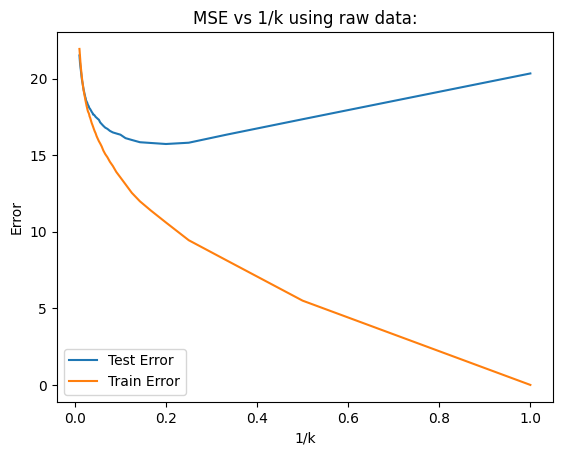

In [161]:
#graph   
plt.plot(k_inv,test_err, label='Test Error')
plt.plot(k_inv,train_err, label='Train Error')
plt.xlabel('1/k')
plt.ylabel('Error')
plt.title('MSE vs 1/k using raw data:') 
plt.legend()    
plt.show()


In [162]:
min_train_mse = np.min((pd.DataFrame(np.column_stack([list(1/np.array(K)), train_err, test_err]), columns=['1/k', 'train_error', 'test_error'])).train_error)
min_test_mse = np.min((pd.DataFrame(np.column_stack([list(1/np.array(K)), train_err, test_err]), columns=['1/k', 'train_error', 'test_error'])).test_error)
vals = pd.DataFrame(np.column_stack([list(1/np.array((range(1,101)))), train_err, test_err]), 
                             columns=['1/k', 'train_error', 'test_error'])
print('k value is :\n', vals)
print("Least Test error is ",min_test_mse)
print("Least Train error is ",min_train_mse)
print('Least test error is at k = 4')

k value is :
          1/k  train_error  test_error
0   1.000000     0.000000   20.332543
1   0.500000     5.500468   17.344087
2   0.333333     8.126551   16.338840
3   0.250000     9.444740   15.810755
4   0.200000    10.600769   15.726820
..       ...          ...         ...
95  0.010417    21.777155   21.353818
96  0.010309    21.829599   21.407387
97  0.010204    21.857310   21.440896
98  0.010101    21.894854   21.479490
99  0.010000    21.933470   21.508311

[100 rows x 3 columns]
Least Test error is  15.726819842563568
Least Train error is  0.0
Least test error is at k = 4


In [163]:
# using normalized scaled feature
X_data = df.loc[:, ['AT', 'V', 'AP', 'RH']]
y_data = df[['PE']]
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
y_train_norm = scaler.fit_transform(y_train)
y_test_norm = scaler.fit_transform(y_test)

normalized_X = scaler.fit_transform(X_data)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normalized_X, y_data, test_size=0.3, random_state=42)

K = np.arange(1,101)
norm_train_err = np.array([])
norm_test_err = np.array([])
k_val = np.array([])
k_inv = [(1/k) for k in K]

for k in K:
    k_val = np.append(k_val, k)
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    neigh.set_params(n_neighbors=k,n_jobs = -1)    
    neigh.fit(X_train_norm, y_train_norm)
    norm_train_pred = neigh.predict(X_train_norm)
    norm_test_pred = neigh.predict(X_test_norm)
    norm_train_err = np.append(norm_train_err, (mean_squared_error(y_train_norm, norm_train_pred)))
    norm_test_err = np.append(norm_test_err, (mean_squared_error(y_test_norm, norm_test_pred)))
    


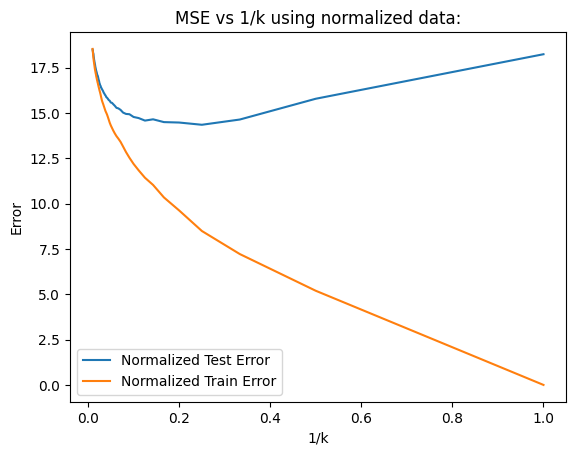

In [164]:
#graph

plt.plot(k_inv,norm_test_err, label='Normalized Test Error')
plt.plot(k_inv,norm_train_err, label='Normalized Train Error')
plt.xlabel('1/k')
plt.ylabel('Error')
plt.title('MSE vs 1/k using normalized data:') 
plt.legend()
plt.show()


In [165]:
min_train_normalize = np.min((pd.DataFrame(np.column_stack([list(1/np.array(K)), norm_train_err, norm_test_err]), columns=['1/k', 'train_error_normalized', 'test_error_normalized'])).train_error_normalized)
min_test_normalize = np.min((pd.DataFrame(np.column_stack([list(1/np.array(K)), norm_train_err, norm_test_err]), columns=['1/k', 'train_error_normalized', 'test_error_normalized'])).test_error_normalized)
vals = pd.DataFrame(np.column_stack([list(1/np.array((range(1,101)))), norm_train_err, norm_test_err]), 
                             columns=['1/k', 'train_error', 'test_error'])
print('k value is :\n', vals)
print('min_test_err for normalized ',min_test_normalize)
print('min_train_err for normalized',min_train_normalize)
print('Least test error is at k = 3')


k value is :
          1/k  train_error  test_error
0   1.000000     0.000000   18.239453
1   0.500000     5.193593   15.783890
2   0.333333     7.216737   14.638276
3   0.250000     8.489532   14.348653
4   0.200000     9.624415   14.472256
..       ...          ...         ...
95  0.010417    18.410941   18.431318
96  0.010309    18.446295   18.451387
97  0.010204    18.480281   18.457115
98  0.010101    18.508370   18.468876
99  0.010000    18.532041   18.493085

[100 rows x 3 columns]
min_test_err for normalized  14.348653474399166
min_train_err for normalized 0.0
Least test error is at k = 3


#### 1.(j)Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

#### From the above results :

1. The smallest test_error is when KNN Regression is used with normalization, hence KNN with normalization fits the data best

- The non normalized data gives test error 15.726819842563568 when k=4 and 

- normalized data gives least test error 14.348653474399166 when k = 3

2. The regression_err using interaction terms gives test error of 21.23 and with significant LR giver test error 18.69 

### ISLR 2.4.1
For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer. 

(a) The sample size n is extremely large, and the number of predictors p is small. 

(b) The number of predictors p is extremely large, and the number of observations n is small. 

(c) The relationship between the predictors and response is highly non-linear. 

(d) The variance of the error terms, i.e. σ2 = Var(), is extremely high.

#### Answers with brief justification:

a) better : because the sample size is extremely large and predictor is small, so flexible statistical learning model will perform better.

b) Worse : The flexible method with suffer overfitting and have large variance when the sample size is very large.

c) Better: The flexible method would obtain a better fit as it is better in in describing non-linear relationship.

d) Worse: The flexible method would suffer overfitting as it would easy fit into the noise.

### ISLR 2.4.7
The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. 
Obs. X1 X2 X3 Y 1 0 3 0 Red 2 2 0 0 Red 3 0 1 3 Red 4 0 1 2 Green 5 −1 0 1 Green 6 1 1 1 Red Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

#### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0

In [166]:
# https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

data = [[0,3,0,'r'],
        [2,0,0,'r'],
        [0,1,3,'r'],
        [0,1,2,'g'],
        [-1,0,1,'g'],
        [1,1,1,'r']]
print(data)
test1 = np.array([0,0,0])
print(test1)
for i in data:
    temp = np.linalg.norm(np.array(test1)-np.array(i[:-1]))
    print('dist is', temp)


[[0, 3, 0, 'r'], [2, 0, 0, 'r'], [0, 1, 3, 'r'], [0, 1, 2, 'g'], [-1, 0, 1, 'g'], [1, 1, 1, 'r']]
[0 0 0]
dist is 3.0
dist is 2.0
dist is 3.1622776601683795
dist is 2.23606797749979
dist is 1.4142135623730951
dist is 1.7320508075688772


(b) What is our prediction with K = 1? Why?

Ans. observation 5 is closest neighbour with k=1, hence test point response prediction is 'green'

(c) What is our prediction with K = 3? Why?

Ans. observation 2,5,6 are closest neighbours with k =3 , hence by majority polling the response prediction is 'red'

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why

Ans. The best value of K would be small because k would have smaller datat point that would fit the non-linear boundary better.

References and Citations

1. https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
3. https://seaborn.pydata.org/generated/seaborn.scatterplot.html
4. https://www.analyticsvidhya.com/blog/2021/05/learn-simple-linear-regression-slr/?utm_source=feed&utm_medium=feed-articles&utm_campaign=feed
5. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
